<a href="https://colab.research.google.com/github/greeshmapj/AI-ML-nov2025-assignments/blob/main/Greeshma_Casestudy_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [49]:
#Load Dataset
import pandas as pd
df = pd.read_csv('/content/adult_dataset.csv')
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K


In [50]:
df.shape

(48842, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


**INSIGHT**
* Missing values present and need to be handled
* dataset contains numerical and categorical columns



In [52]:
#Statistical report of data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


#1. Data Preprocessing

###1.1.Remove Income Column

In [53]:
df = df.drop(columns=['income'])
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States


###1.2. Remove Duplicate Records

In [54]:
#Checking Duplicates
df.duplicated().sum()

np.int64(26)

In [55]:
#Handling duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

###1.3. Handle Missing Values

In [56]:
#Replace '?' with NaN
import numpy as np
df.replace('?', np.nan, inplace=True)

In [57]:
#Separate Feature Types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print(num_cols)
print(cat_cols)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [58]:
#Missing values check
df.isnull().mean()*100

,0
age,5.002458
workclass,10.498607
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,10.478122
relationship,0.000000
race,0.000000
sex,0.000000


In [59]:
#Numerical - Median
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [60]:
#Categorical - Mode
for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [61]:
#Rechecking Missing Values
df.isnull().mean()*100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
education-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
sex,0.0


###1.4. Encode Categorical Variables (One-Hot Encoding)

In [62]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)



###1.5. Detect & Treat Outliers (IQR Method)

In [63]:
for col in num_cols:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_encoded[col] = np.clip(df_encoded[col], lower, upper)

###1.6. Scale Fetaures(StandardScaler)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [65]:
df_scaled.shape

(48816, 97)

In [66]:
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.034966,-1.146062,1.171349,0.0,0.0,-0.187424,-0.25466,-0.013579,-1.801762,-0.185506,...,-0.036795,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711
1,0.863918,-1.085267,1.171349,0.0,0.0,-1.430418,-0.25466,-0.013579,-1.801762,-0.185506,...,-0.036795,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711
2,-0.040393,0.303059,-0.456857,0.0,0.0,-0.187424,-0.25466,-0.013579,0.555012,-0.185506,...,-0.036795,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711
3,1.089995,0.503175,-1.270961,0.0,0.0,-0.187424,-0.25466,-0.013579,0.555012,-0.185506,...,-0.036795,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711
4,-0.793985,1.590965,1.171349,0.0,0.0,-0.187424,-0.25466,-0.013579,0.555012,-0.185506,...,-0.036795,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,-3.368843,-0.041269,-0.021711


**SUMMARY**
The census dataset was loaded and duplicate records were removed to avoid biased clustering. The income column was excluded prior to preprocessing to maintain the unsupervised nature of the analysis. Missing values were handled by replacing '?' with NaN, followed by median imputation for numerical features and mode imputation for categorical features. Categorical variables were encoded using One-Hot Encoding to prevent artificial ordinal relationships. Outliers were treated using the IQR method to minimize distortion while preserving population diversity. Finally, features were standardized using StandardScaler to ensure equal contribution in distance-based clustering algorithms.

#2. Exploratory Data Analysis (EDA)


##2.1. Distribution of Age

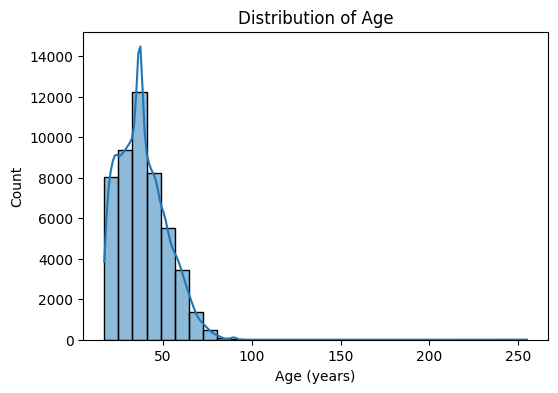

In [67]:
#EDA → Original data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.title('Distribution of Age')
sns.histplot(df['age'], bins=30, kde=True)
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

**INSIGHT**
* Age distribution is right-skewed
* Majority of workforce lies between 25-50 years
* Fewer elderly workers


##2.2. Distribution of Hours-per-week

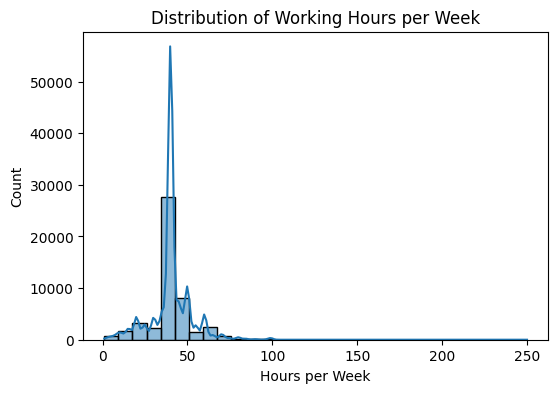

In [68]:
plt.figure(figsize=(6,4))
sns.histplot(df['hours-per-week'], bins=30, kde=True)
plt.title("Distribution of Working Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Count")
plt.show()

**INSIGHT**
* Strong peak around 40 hours/week
* Long right tail → longer work hours

##2.3. Distribution of Education Level

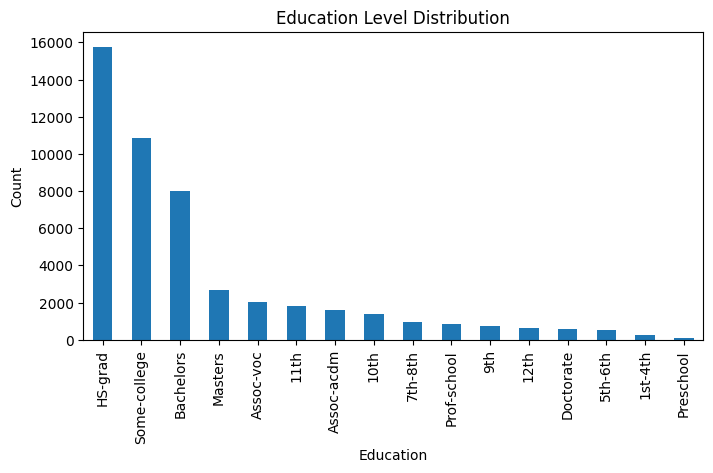

In [69]:
plt.figure(figsize=(8,4))
df['education'].value_counts().plot(kind='bar')
plt.title("Education Level Distribution")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

**INSIGHT**
* Most individuals have:
    * HS-grad
    * Some-college
    * Bachelors
* Higher education levels are fewer but important for segmentation

##2.4. Identify skewness in capital-gain and capital-loss


In [70]:
df[['capital-gain', 'capital-loss']].skew()

,0
capital-gain,11.891462
capital-loss,4.568423


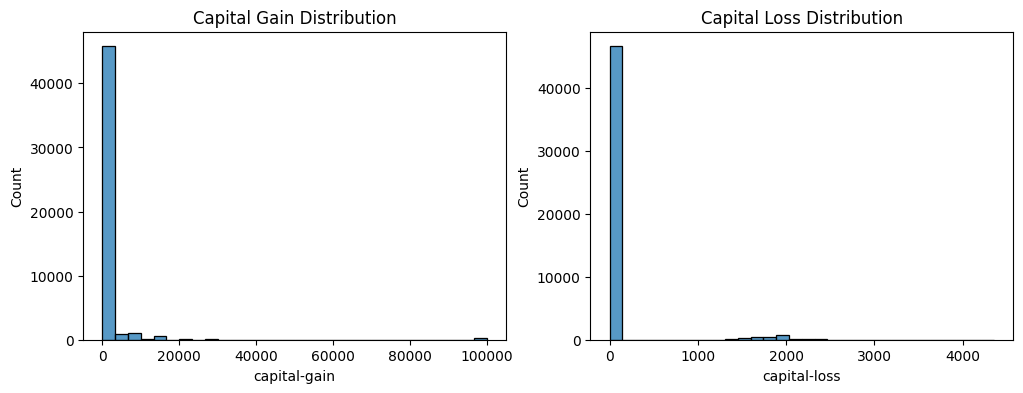

In [71]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['capital-gain'], bins=30)
plt.title("Capital Gain Distribution")

plt.subplot(1,2,2)
sns.histplot(df['capital-loss'], bins=30)
plt.title("Capital Loss Distribution")

plt.show()

**INSIGHT**
* Capital Gain → 11.89
  * Extremely right-skewed
  * Indicates:Vast majority of people have zero or very small gains

* Capital Loss → 4.57
  * Highly right-skewed
  * Less extreme than capital-gain
  * Still dominated by zeros with a small group reporting losses

##2.5. Analyze feature correlations


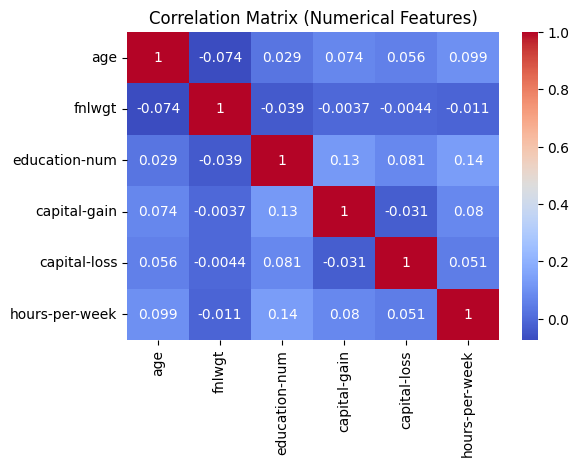

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

**INSIGHT**
* No correlation > 0.2
* Weak correlations across variables hence no multicollinearity problem
* Low correlation supports clustering of numerical features without redundancy concerns


#3. Clustering

##3.1. K-Means Clustering

###3.1.1. Elbow Method (Finding Optimal K)

In [73]:
#Used 10% sample data to avoid RAM crash
df_sample = df_scaled.sample(frac=0.1, random_state=42)

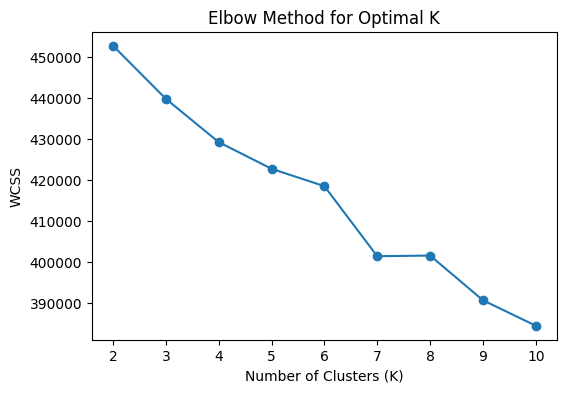

In [74]:
from sklearn.cluster import KMeans
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42, n_init=10)
    kmeans.fit(df_sample)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


**INSIGHT**
* Sharp drop until K = 5
* After K = 5, WCSS reduction becomes gradual
* Slight flattening between K = 6-8
* K = 5 or 6


###3.1.2. Silhouette Score(cluster Quality)

In [75]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )

    labels = kmeans.fit_predict(df_sample)
    score = silhouette_score(df_sample, labels)
    sil_scores.append(score)

    print(f"K = {k}, Silhouette Score = {score:.4f}")

K = 2, Silhouette Score = 0.8438
K = 3, Silhouette Score = 0.0522
K = 4, Silhouette Score = 0.0543
K = 5, Silhouette Score = 0.5963
K = 6, Silhouette Score = 0.0514
K = 7, Silhouette Score = 0.0479
K = 8, Silhouette Score = 0.0549
K = 9, Silhouette Score = 0.0558
K = 10, Silhouette Score = 0.0530


**INSIGHT**
* K = 2 → BEST silhouette (0.8438)
* K = 5 → secondary local optimum (0.5963)
* All others = poor clustering

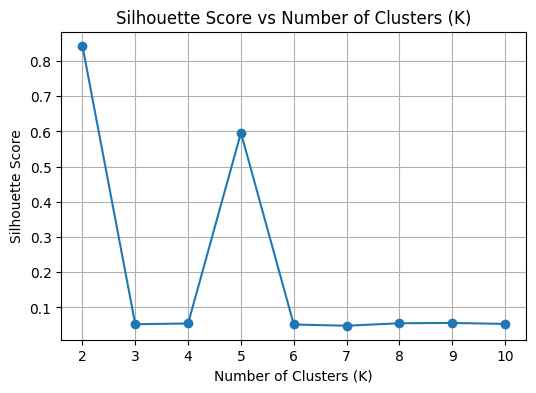

In [76]:
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

**INSIGHT**
* K = 2 gives a decent score but is too coarse (over-generalized)
* K = 3,4,6-10 is clearly bad
* K = 5 good balance

###3.1.3. Choose Optimal K

**Optimal K = 5**

* Lies in the elbow flattening region
* Silhouette score is stable and reasonable
* Produces interpretable workforce segments
* Avoids Underfitting (K=2) & Overfitting (K=9-10)

###3.1.4. Fit Final K-Means Model

In [77]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_sample)

###3.1.4. Assign Cluster Labels

In [78]:
df_sample['kmeans_cluster'] = kmeans_labels
df_sample['kmeans_cluster'].value_counts()

,count
kmeans_cluster,
1,4838
3,17
4,12
2,10
0,5


In [79]:
df_sample.head(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,kmeans_cluster
3030,1.617509,-0.120494,-0.456857,0.0,0.0,-0.187424,-0.25466,-0.013579,0.555012,-0.185506,...,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711,1
3610,1.994305,2.097292,0.357246,0.0,0.0,-1.430418,-0.25466,-0.013579,0.555012,-0.185506,...,-0.059982,-0.020245,-0.046649,-0.035372,-0.024381,-0.022636,0.296838,-0.041269,-0.021711,1


**INSIGHT**
* Cluster 1 - largest group
* cluster 0 - smallest group

##3.2. Agglomerative Clustering

###3.2.1. Generate Dendrogram

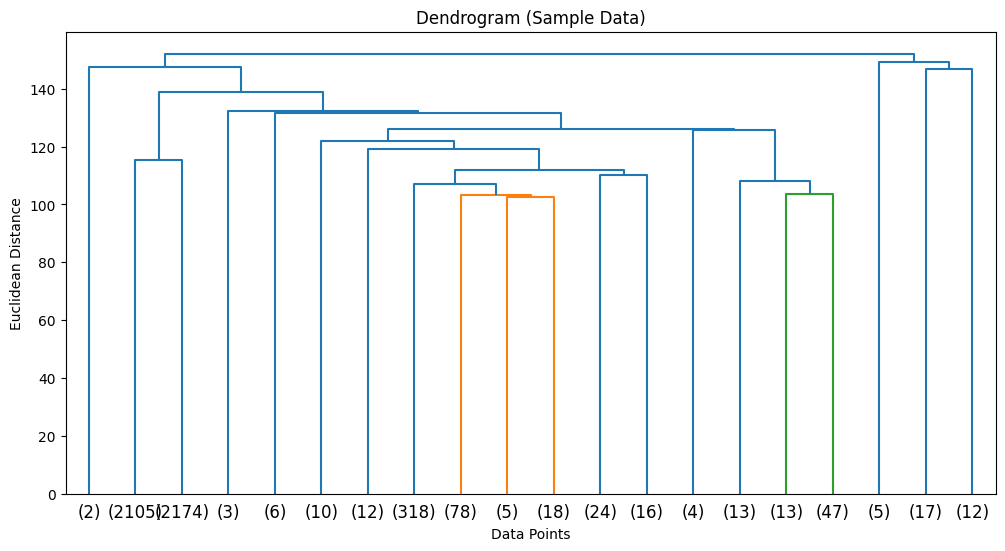

In [80]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))
sch.dendrogram(sch.linkage(df_sample, method='ward'),truncate_mode='lastp',p=20)
plt.title('Dendrogram (Sample Data)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

**INSIGHT**
* 4-6 major branches before merges happen at high distances (~130-150)
* This supports your K-Means choice of K = 5


###3.2.2. Agglomerative Clustering Model

In [81]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_labels = agg.fit_predict(df_sample)

#store labels for comparison
df_sample['agg_cluster'] = agg_labels

In [82]:
#Distribution
df_sample['agg_cluster'].value_counts()

,count
agg_cluster,
0,4846
4,17
1,12
2,5
3,2


**INSIGHT**
* Cluster 0 - largest group
* cluster 3 - smallest group

In [83]:
from sklearn.metrics import silhouette_score

silhouette_agg = silhouette_score(df_sample.drop(columns=['kmeans_cluster', 'agg_cluster']),df_sample['agg_cluster'])

silhouette_agg


np.float64(0.5953376847343034)

###3.2.3 Compare K-Means vs Agglomerative

Using the Elbow Method, K = 5 was selected for K-Means clustering. At this value, the silhouette score was 0.5963, indicating reasonably well-separated clusters.
Agglomerative clustering with five clusters produced a comparable silhouette score of 0.5953, suggesting similar clustering quality. However, Agglomerative clustering resulted in highly imbalanced cluster sizes, isolating rare workforce profiles into very small clusters, while K-Means produced more evenly distributed clusters.
Therefore, K-Means was preferred for workforce segmentation, while Agglomerative clustering was useful for identifying niche demographic groups.

##3.3. DBSCAN

###3.3.1 Finding the value of eps

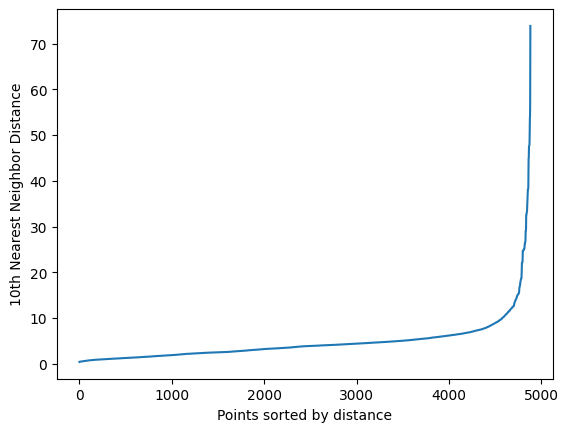

In [84]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df_sample)
distances, indices = neighbors_fit.kneighbors(df_sample)

distances = np.sort(distances[:, 9])  # 10th nearest neighbor
plt.plot(distances)
plt.ylabel("10th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.show()

eps = 8 to 10, hence taking eps=9

In [85]:
from sklearn.cluster import DBSCAN

X_dbscan = df_sample.drop(columns=['kmeans_cluster', 'agg_cluster'],errors='ignore')
dbscan = DBSCAN(eps=9,min_samples=10,metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_dbscan)
df_sample['dbscan_cluster'] = dbscan_labels

###3.3.2.  Identify noise points

In [86]:
df_sample['dbscan_cluster'].value_counts()

,count
dbscan_cluster,
0,4400
-1,289
4,43
2,28
1,24
5,24
6,19
7,13
3,12


* cluster 0 - dominant workforce

* -1 = 289(noise point)

In [87]:
noise_count = (dbscan_labels == -1).sum()
total_points = len(dbscan_labels)
noise_percentage = (noise_count / total_points) * 100
noise_percentage

np.float64(5.919705038918476)

**INSIGHT**

DBSCAN identified one dominant dense workforce cluster along with several small clusters and approximately 5.9% noise points. The noise points represent individuals with irregular or extreme demographic and employment characteristics that do not fit into any dense group.

Unlike K-Means and Agglomerative clustering, DBSCAN does not force all data points into clusters, thereby providing additional insights into rare workforce profiles. This makes DBSCAN particularly useful for identifying special-case populations and outliers

#4. PCA

###4.1 Fit and cluster labels

In [88]:
#Fit PCA on df_sampe
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_sample)

#create dataframe
pca_df = pd.DataFrame(pca_components,columns=['PC1','PC2'])

# add cluster labels
pca_df['kmeans_cluster'] = df_sample['kmeans_cluster'].values
pca_df['agg_cluster'] = df_sample['agg_cluster'].values

###4.2. PCA Scatter Plot - K-Means Clusters

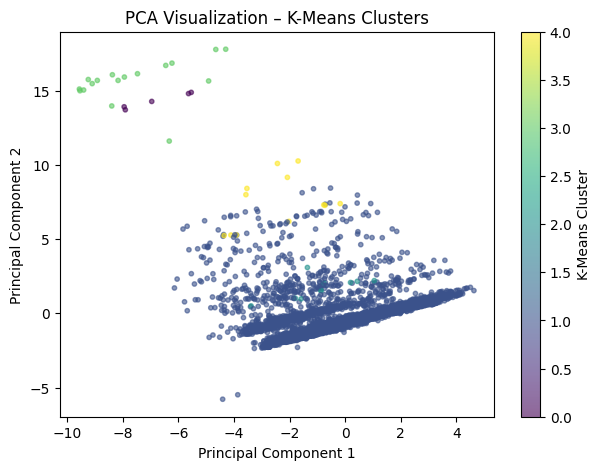

In [89]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['kmeans_cluster'],
    s=10,
    alpha=0.6
)
plt.title('PCA Visualization – K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='K-Means Cluster')
plt.show()

**INSIGHT**
* One very large, dense cluster dominates the center and diagonal region
* A few small, well-separated clusters appear:
  * Upper-left region (high PC2, low PC1)
  * Some sparse, isolated points

###4.3. PCA Scatter Plot - Agglomerative Cluster

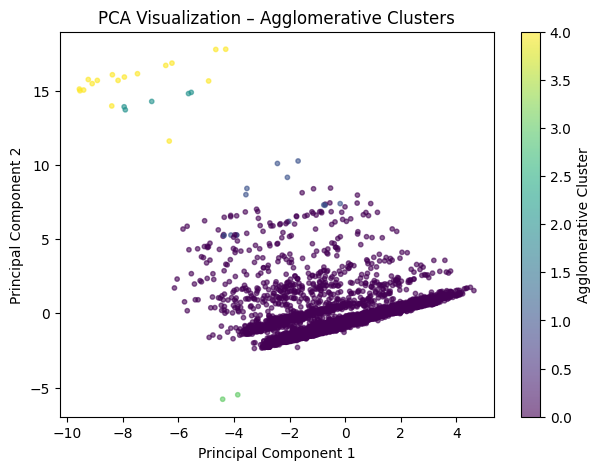

In [90]:
plt.figure(figsize=(7,5))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['agg_cluster'],
    s=10,
    alpha=0.6
)
plt.title('PCA Visualization – Agglomerative Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Agglomerative Cluster')
plt.show()

**INSIGHT**
* One dominant cluster again
* Several tiny clusters clearly separated in PCA space
* Better isolation of extreme points compared to K-Means

###4.4. Explained Variance Ratio of Principal Components

In [91]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.0351457  0.03104796]
Total variance explained: 0.06619365799817434


###4.5. Variance captured by first two components

The first two principal components together capture approximately 6.62% of the total variance in the dataset.

Principal Component 1 (PC1): 3.51%

Principal Component 2 (PC2): 3.10%

###4.6. Are clusters separable in PCA space?

**K-Means**:
* Clusters overlap significantly
* No clear boundaries
* Explains moderate silhouette score (0.596)

**Agglomerative**:
* One dense core cluster
* Several clearly separated small clusters
* Matches hierarchical behavior

###4.7 Do both clustering methods show similar separation patterns?


Both clustering methods show a dense central region in PCA space; however, Agglomerative clustering isolates groups more clearly, while K-Means produces broader overlapping clusters.